In [1]:
import pandas as pd
dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.24_GradientBoosting/train_titanic.csv')

In [2]:
dados

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dados.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
dados.isnull().sum()/len('PassengerId')*100 #Nao funcionou! Apareceram numeros maiores que 100!!!

PassengerId       0.000000
Survived          0.000000
Pclass            0.000000
Name              0.000000
Sex               0.000000
Age            1609.090909
SibSp             0.000000
Parch             0.000000
Ticket            0.000000
Fare              0.000000
Cabin          6245.454545
Embarked         18.181818
dtype: float64

In [5]:
dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
faltantes=dados.isnull().sum()
faltantespercent=faltantes/len(dados['PassengerId'])
faltantespercent
#Agora funcionou, mas nao entendi pq o comando acima nao funcionou
#Copiei este comando do Natanael, na explicaçao deste exercicio

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
#Eliminar a variavel NOME nao agrega nada para a classificaçao dos dados
#PASSANGER ID pois num problema de classificaçao essa variavel pode influenciar devido aos valores serem muito grandes
#TICKET pois nao agrega nada para a classificaçao dos dados
#CABIN pois tem muitos dados faltantes

In [8]:
dados1=dados.drop(['PassengerId', 'Name','Ticket','Cabin'], axis=1)

In [9]:
dados1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

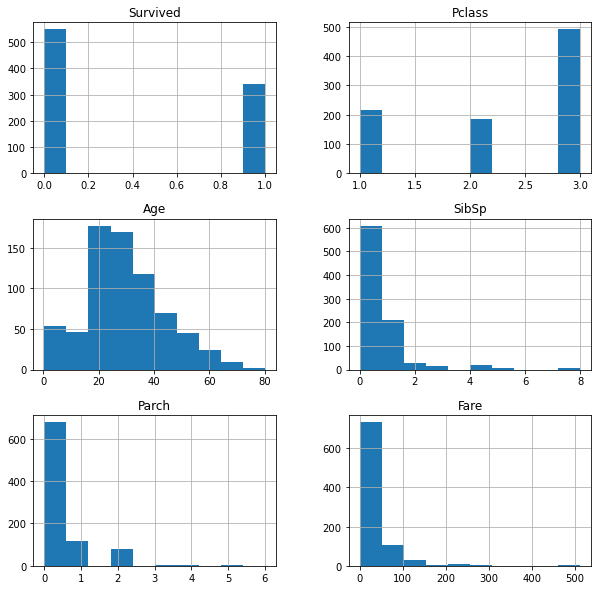

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize']=10,10
dados1.hist()
plt.show()

In [11]:
#EMBARKED: Nao apareceu no histograma! Converter para numero
#AGE: completar dados faltantes com media. Dados melhor distribuidos.

In [12]:
[dados1[c].value_counts() for c in list(dados1.columns)]

[0    549
 1    342
 Name: Survived, dtype: int64,
 3    491
 1    216
 2    184
 Name: Pclass, dtype: int64,
 male      577
 female    314
 Name: Sex, dtype: int64,
 24.00    30
 22.00    27
 18.00    26
 19.00    25
 28.00    25
          ..
 36.50     1
 55.50     1
 0.92      1
 23.50     1
 74.00     1
 Name: Age, Length: 88, dtype: int64,
 0    608
 1    209
 2     28
 4     18
 3     16
 8      7
 5      5
 Name: SibSp, dtype: int64,
 0    678
 1    118
 2     80
 5      5
 3      5
 4      4
 6      1
 Name: Parch, dtype: int64,
 8.0500     43
 13.0000    42
 7.8958     38
 7.7500     34
 26.0000    31
            ..
 35.0000     1
 28.5000     1
 6.2375      1
 14.0000     1
 10.5167     1
 Name: Fare, Length: 248, dtype: int64,
 S    644
 C    168
 Q     77
 Name: Embarked, dtype: int64]

In [13]:
dadosx=dados1.drop('Survived', axis=1)

In [14]:
dadosxdum=pd.get_dummies(dadosx)

In [15]:
dadosxdum.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [16]:
dadosxdum.fillna(dadosxdum.mean(), inplace=True)

In [17]:
dadosxdum.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [18]:
dadosy=dados1['Survived']

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
modelo=GradientBoostingClassifier()
divdados=StratifiedKFold(n_splits=3,shuffle=True) #Adiçao do StratifiedKfold
param={'learning_rate':[1,0.5,0.1,0.07,0.05],'n_estimators':[50,100,500,700]}
otimiza=GridSearchCV(modelo,param,n_jobs=-1,cv=divdados)
otimiza.fit(dadosxdum,dadosy)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.1, 0.07, 0.05],
                         'n_estimators': [50, 100, 500, 700]})

In [20]:
otimiza.best_score_

0.8327721661054994

In [21]:
otimiza.best_params_

{'learning_rate': 0.07, 'n_estimators': 100}